In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('abalone.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

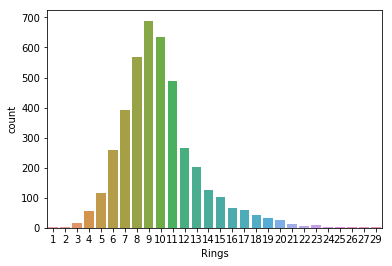

In [8]:
sns.countplot(data.Rings)

[]

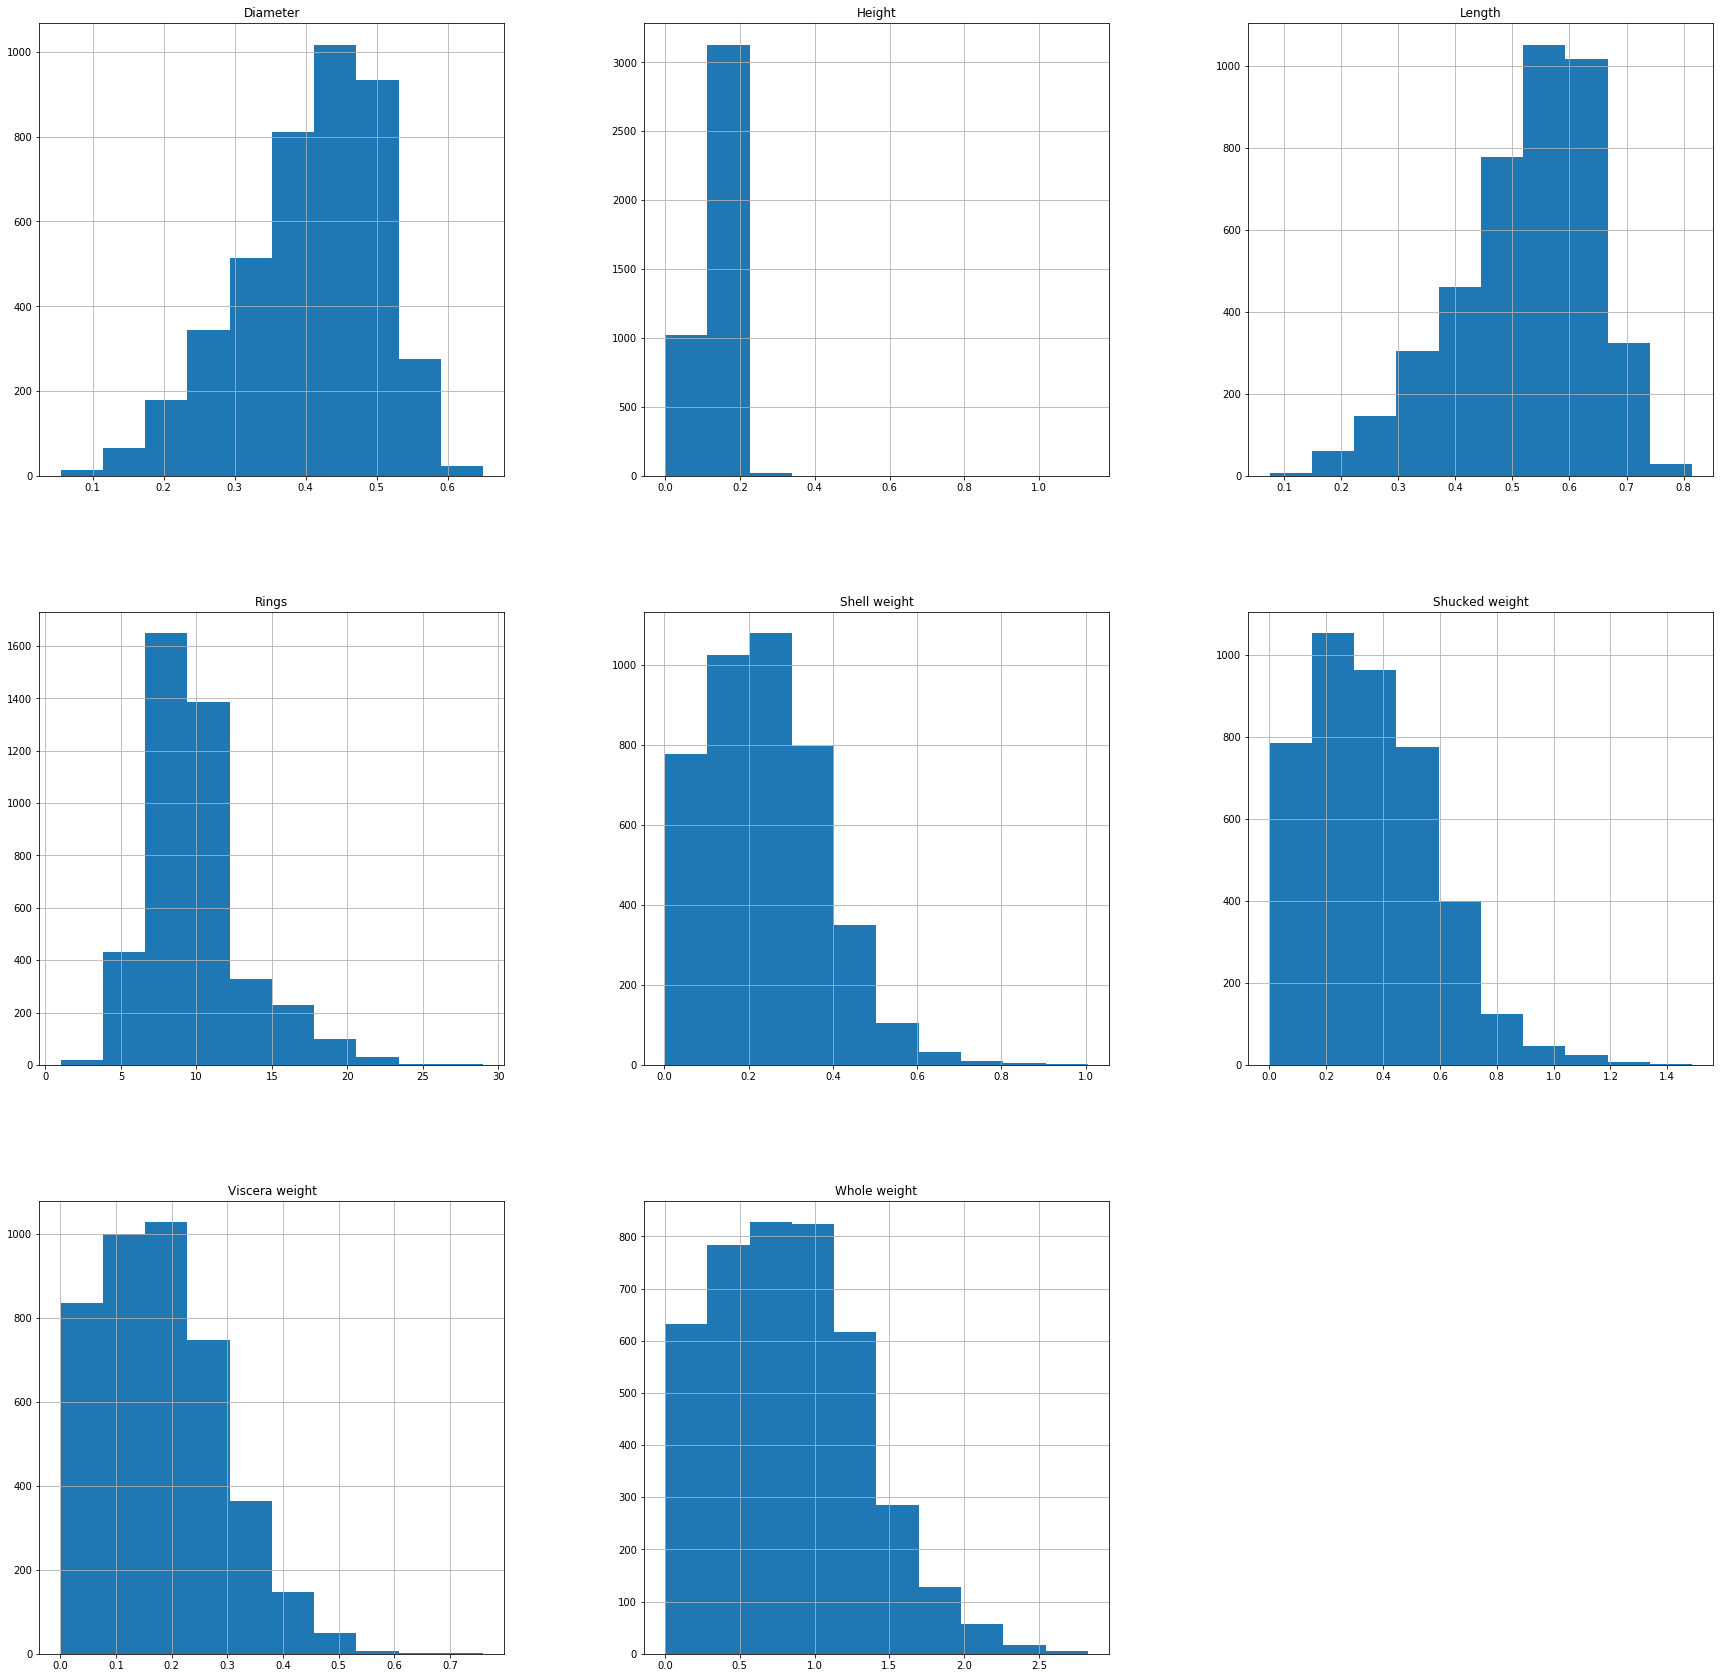

In [9]:
data.hist(figsize=(30,30))
plt.plot()

In [10]:
data = data[data.Height > 0]

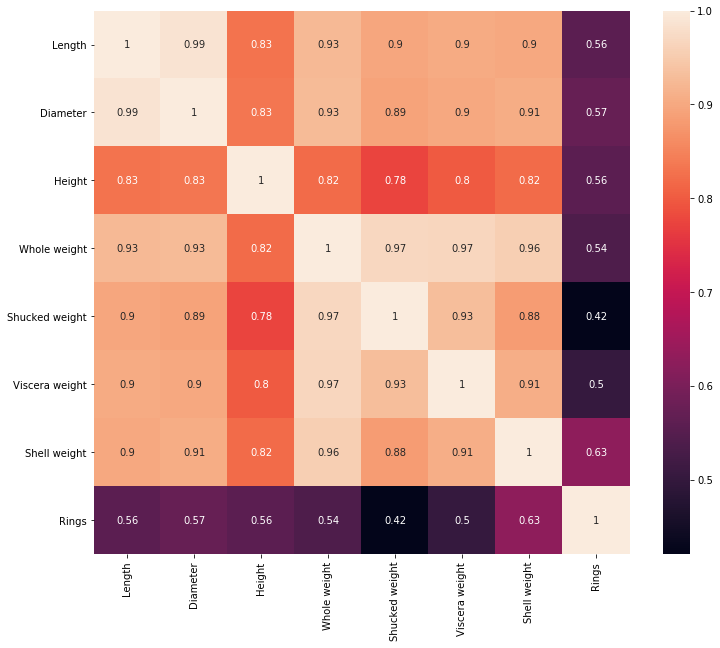

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

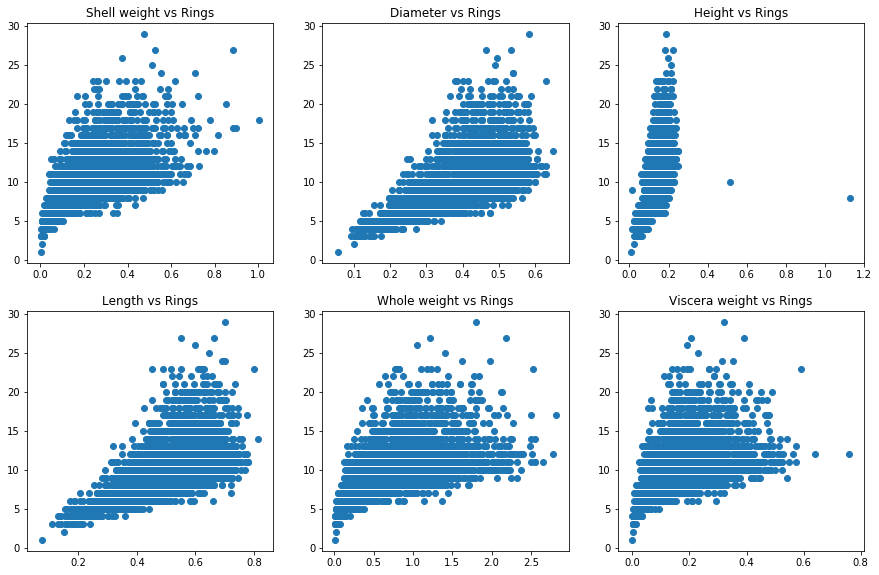

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(data['Shell weight'],data['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(data['Diameter'],data['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(data['Height'],data['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(data['Length'],data['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(data['Whole weight'],data['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(data['Viscera weight'],data['Rings'])



# Cleaning the data


In [13]:
# As we can see that the data we have at disposal is great for predicting the Rings between 3 to 15 years.

new_data = data[data.Rings < 16]
new_data = new_data[new_data.Rings > 2] 
new_data = new_data[new_data.Height < 0.4]

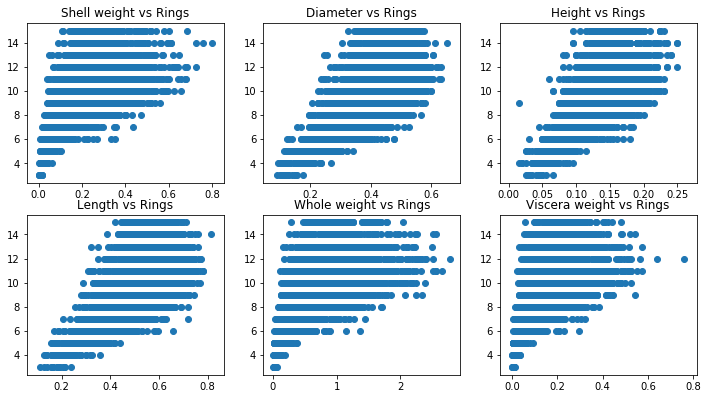

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(3,3,1)
plt.title('Shell weight vs Rings')
plt.scatter(new_data['Shell weight'],new_data['Rings'])

plt.subplot(3,3,2)
plt.title('Diameter vs Rings')
plt.scatter(new_data['Diameter'],new_data['Rings'])

plt.subplot(3,3,3)
plt.title('Height vs Rings')
plt.scatter(new_data['Height'],new_data['Rings'])

plt.subplot(3,3,4)
plt.title('Length vs Rings')
plt.scatter(new_data['Length'],new_data['Rings'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Rings')
plt.scatter(new_data['Whole weight'],new_data['Rings'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Rings')
plt.scatter(new_data['Viscera weight'],new_data['Rings'])



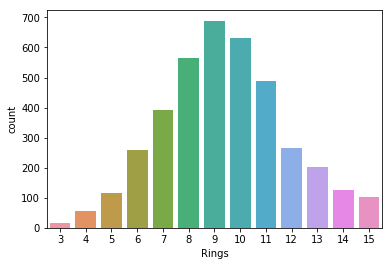

In [15]:
sns.countplot(new_data.Rings)

In [16]:
new_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [17]:
new_col = pd.get_dummies(new_data.Sex)
new_data[new_col.columns] = new_col

In [18]:
new_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

In [19]:
X=new_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'F', 'I', 'M']]
y=new_data['Rings']

In [20]:
from sklearn.preprocessing import StandardScaler
convert = StandardScaler()
X = convert.fit_transform(X)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state= 0)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
pr=lr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,pr)

0.5409265479927547

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
prfr=rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,prfr)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5295835377939736

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pdtr=rfr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,pdtr)  

0.5295835377939736

# So after applying all the regression models,Linear regression seems to be the best among them with 54% accuracy.